In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [142]:
data = pd.read_csv("insurance.csv")

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [144]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [145]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


determining the correlation between variables
1. positive correlation (one variable increses another also increses)
2. negitive correlation(opposite of above)

In [146]:
correlation = data.corr()

<AxesSubplot:>

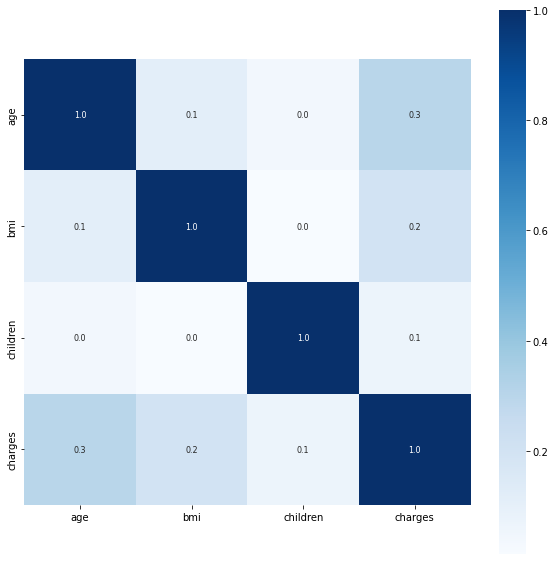

In [147]:
#constucting the heat map for understanding correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation,cbar = True,square = True,fmt = '.1f',annot = True,annot_kws = {'size':8},cmap = 'Blues')

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [155]:
#splitting the data and the target

data.replace({'sex':{'male':0,'female':1}},inplace = True)
data.replace({'smoker':{'yes':0,'no':1}},inplace = True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)


In [156]:
x = data.drop(['charges'],axis = 1)
y = data['charges']

In [157]:
#splitting the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 2)

In [158]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (936, 6) (402, 6)


In [159]:
#model training 
model = LinearRegression()

In [160]:
#training the data
model.fit(x_train,y_train)

LinearRegression()

In [161]:
#prediction on training data
training_data_prediction = model.predict(x_train)

In [162]:
training_data_prediction

array([ 8.25871144e+03,  6.20575896e+03,  3.07311610e+04,  3.28118009e+03,
        5.75153533e+03,  1.08958811e+04,  3.60744496e+04,  1.14542146e+04,
        2.08693227e+03,  1.28951814e+04,  2.65669808e+03,  1.57199296e+04,
        4.03003158e+03,  7.58330247e+03,  9.91171939e+03,  1.50270643e+04,
        9.30462690e+03,  1.21839447e+04,  3.05153671e+04,  7.16198717e+03,
        2.67313896e+04,  1.35106893e+04,  1.11341576e+04,  1.64502213e+03,
        3.32286112e+04, -1.30105642e+03,  6.04149836e+03,  9.63453913e+03,
        2.68619387e+04,  2.74210337e+04,  1.17154760e+04,  7.07547757e+03,
        2.94334506e+04,  1.34940612e+04,  2.58827937e+03,  3.92976574e+03,
        4.02778529e+04,  7.84019795e+03,  1.10761537e+04,  4.14751513e+03,
        4.41105739e+03,  8.93233441e+03,  3.46487955e+04,  4.12187134e+03,
        8.26493935e+03,  2.19778450e+03,  3.60760031e+04,  3.75844069e+02,
        3.52371018e+03,  1.41869185e+04,  7.74999740e+03,  5.41546285e+03,
        6.79329821e+03,  

In [183]:
from sklearn import metrics



In [184]:
# R square error
score_1 = metrics.r2_score(ay_train,training_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

In [185]:
print(score_1)
print(score_2)

0.7415730843556845
4205.625865075326


In [165]:
#predicting the test data
test_data_prediction = model.predict(x_test)

In [166]:
test_data_prediction

array([ 1.52905922e+03,  1.15159860e+04,  9.98088190e+03,  2.43337767e+03,
        7.82749982e+03,  1.13068410e+04,  3.56733241e+03,  8.38406054e+02,
        1.20405675e+04,  9.71096415e+03,  1.15267355e+04,  5.24083046e+03,
        2.95044573e+04, -2.72741582e+02,  1.24804353e+04,  1.31986369e+04,
        3.79276456e+03,  8.04235339e+03,  2.89684350e+04,  2.55075013e+03,
        1.24126055e+04,  2.45265402e+03,  3.40989471e+04,  3.12610302e+04,
        3.00321939e+04,  8.83745906e+03,  2.00362652e+03,  1.54516618e+04,
        6.77893451e+03,  2.13838860e+03,  9.67775875e+03,  5.93455029e+03,
        4.56081573e+03,  4.99101990e+03,  9.69182369e+03,  4.92893212e+03,
        2.97023591e+04,  6.80259603e+03,  2.67463611e+04,  1.39207860e+04,
        3.91617318e+02,  2.79941173e+04,  7.83934264e+03,  1.63742515e+03,
        1.04625590e+04,  8.21348252e+03,  1.15589337e+04,  8.38217771e+03,
        1.10339426e+04,  1.37618764e+04,  5.98252215e+03, -7.00825467e+02,
        2.59455467e+04,  

In [167]:
# R square error
score_1 = metrics.r2_score(y_test,test_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)

In [168]:
print(score_1)
print(score_2)

0.766118606810119
4251.180538000686


visualizing the actual prices and pedicted prices

Text(0.5, 1.0, 'Actual charges vs predicted charges')

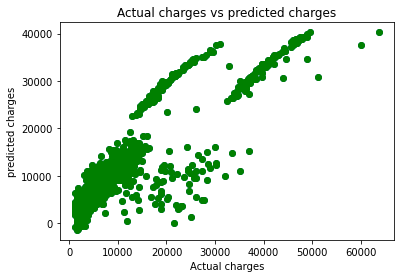

In [190]:
plt.scatter(y_train,training_data_prediction)
plt.scatter(y_train,training_data_prediction,color = 'green')


plt.xlabel("Actual charges")
plt.ylabel("predicted charges")
plt.title("Actual charges vs predicted charges")

In [170]:
#training with another model
from xgboost import XGBRegressor

In [171]:
model_2 = XGBRegressor()

In [172]:
model_2.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [175]:
training_data_prediction_2 = model_2.predict(x_train)

In [177]:
# R square error
score_11 = metrics.r2_score(y_train,training_data_prediction_2)

#mean absolute error
score_22 = metrics.mean_absolute_error(y_train,training_data_prediction_2)

In [178]:
score_11

0.9960808762932135

In [179]:
score_22

451.3254670992297

Text(0.5, 1.0, 'Actual charges vs predicted charges')

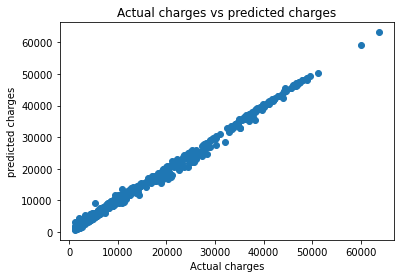

In [180]:
plt.scatter(y_train,training_data_prediction_2)
plt.xlabel("Actual charges")
plt.ylabel("predicted charges")
plt.title("Actual charges vs predicted charges")

# Therefore by cross validation xgb regressor made better prediction than Linear regression
## Since dataset is small xgboost regressor is preffered